# **Sentiment Analysis by NLP**

We'll be using a dataset from the [Datasets for movie reviews](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data)! This dataset is already located in the folder for this section.

### Run one time only

In [0]:
# to increase ram
'''
d=[]
while(1):
  d.append('1')
'''

"\nd=[]\nwhile(1):\n  d.append('1')\n"

### **Load Everything**

In [0]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### **Upload and Read Dataset**

In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.tsv to train.tsv


In [0]:
import io
import pandas as pd

messages = pd.read_csv(io.BytesIO(uploaded['train.tsv']), delimiter='\t')

In [0]:
# for windows jupyter
#messages = pd.read_csv('train.tsv', delimiter='\t')

### **Exploratery data analysis (EDA)**

In [8]:
messages.head(5)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [0]:
messages.drop(columns='PhraseId', inplace=True)

In [15]:
messages.head(5)

,message,label
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2


In [0]:
messages.rename(columns={'Phrase':'message',
                          'Sentiment':'label'}, 
                 inplace=True)

In [17]:
messages.describe()

,label
count,156060.000000
mean,2.063578
std,0.893832
min,0.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,4.000000


In [18]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
0        7072   7072  by a script that takes few chances and manages...    1
1       27273  27273  you 're not interested in discretion in your e...    1
2       79582  79582                                         at a movie    1
3       32927  32927       there are entertaining and audacious moments    1
4        9206   9206  This gorgeous epic is guaranteed to lift the s...    1

### **Data Visualization**

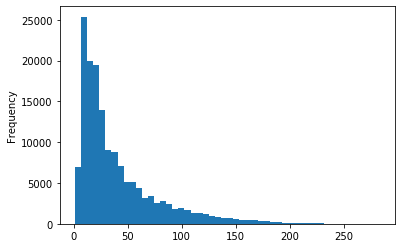

In [79]:
messages['message'].apply(len).plot(bins=50, kind='hist')

In [80]:
messages['message'].apply(len).describe()

count    156060.000000
mean         40.217224
std          38.154130
min           1.000000
25%          14.000000
50%          26.000000
75%          53.000000
max         283.000000
Name: message, dtype: float64

In [0]:
messages['length'] = messages['message'].apply(len)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4db2453748>,
      dtype=object)

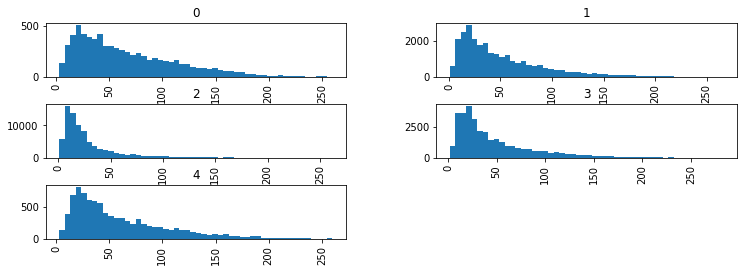

In [87]:
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

### **Text Pre-Processing**

In [0]:
import re

REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NO_SPACE = ""
SPACE = " "

def preprocess_reviews(reviews):
    
    reviews = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in reviews]
    
    return reviews

reviews_train_clean = preprocess_reviews(messages['message'])
reviews_test_clean = preprocess_reviews(messages['message'])

In [0]:
reviews_test_clean

### **Support Vector Machine Algorithm**

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC


stop_words = ['in', 'of', 'at', 'a', 'the']
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 3), stop_words=stop_words)
ngram_vectorizer.fit(reviews_train_clean)
X = ngram_vectorizer.transform(reviews_train_clean)
X_test = ngram_vectorizer.transform(reviews_test_clean)

X_train, X_val, y_train, y_val = train_test_split(
    X, messages['label'], train_size = 0.75
)

for c in [0.001, 0.005, 0.01, 0.05, 0.1]:
    
    svm = LinearSVC(C=c)
    svm.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, svm.predict(X_val))))
    
# Accuracy for C=0.001: 0.88784
# Accuracy for C=0.005: 0.89456
# Accuracy for C=0.01: 0.89376
# Accuracy for C=0.05: 0.89264
# Accuracy for C=0.1: 0.8928
    


Accuracy for C=0.001: 0.5589388696655133
Accuracy for C=0.005: 0.6057413815199282
Accuracy for C=0.01: 0.6257080610021787
Accuracy for C=0.05: 0.6575419710367807
Accuracy for C=0.1: 0.6615404331667307


### **Again Splitting For further Checking**

In [0]:
Review_X_train,review_x_test, Label_X_val, label_y_val = train_test_split(
    reviews_test_clean, messages['label'], train_size = 0.75
)

In [58]:
Review_X_train[:3], Label_X_val[:3], review_x_test[:3], label_y_val[:3]

(['sociopathy',
  "this one is a few bits funnier than malle 's dud  if only because the cast is so engagingly messing around like slob city reductions of damon runyon crooks ",
  'their surroundings'],
 ['without becoming one itself',
  'for having the guts to confront it',
  'too extreme for tv rendition'],
 124014    2
 130180    3
 38217     3
 Name: label, dtype: int64,
 103373    2
 141797    2
 78073     2
 Name: label, dtype: int64)

### **Term Frequency-Inverse Document Frequency model (TFIDF)**

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(Review_X_train)
#transformed test reviews
tv_test_reviews=tv.transform(review_x_test)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (117045, 17097)
Tfidf_test: (39015, 17097)


### **Bags of words model (Count Vectorizer)**

In [63]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(Review_X_train)
#transformed test reviews
cv_test_reviews=cv.transform(review_x_test)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names


BOW_cv_train: (117045, 17097)
BOW_cv_test: (39015, 17097)


### **Logistic Regression Model**

In [64]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,Label_X_val)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews, Label_X_val)
print(lr_tfidf)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [65]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[2 2 2 ... 2 2 2]
[2 2 2 ... 2 2 2]


In [67]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(label_y_val,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(label_y_val,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.5197744457260028
lr_tfidf_score : 0.510880430603614


### **Multinomial Naive Bayes**

In [68]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,Label_X_val)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,Label_X_val)
print(mnb_tfidf)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [69]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[2 2 2 ... 2 2 2]
[2 2 2 ... 2 2 2]


In [71]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(label_y_val,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(label_y_val,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.5198513392285019
mnb_tfidf_score : 0.5109316929386134


### **Final Model with SVM**

In [73]:
final = LinearSVC(C=0.01)
final.fit(X, messages['label'])
print ("Final Accuracy: %s" 
       % accuracy_score(messages['label'], final.predict(X_test)))

# Final Accuracy: 0.7057477893118032

Final Accuracy: 0.7057477893118032


### **Top Positive and Negetive**

In [25]:
feature_to_coef = {
    word: coef for word, coef in zip(
        ngram_vectorizer.get_feature_names(), final.coef_[0]
    )
}

for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:10]:
    print (best_positive)
    
print("\n\n")
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:10]:
    print (best_negative)

('worst', 0.6150439389572808)
('awful', 0.5537509926546121)
('stupid', 0.5264276632164047)
('bad', 0.48051486043438996)
('terrible', 0.45874389999643506)
('waste', 0.4574668911933255)
('dull', 0.434986245396702)
('mess', 0.4163658419482675)
('ugly', 0.397535005796166)
('unfunny', 0.3970731234251873)



('not bad', -0.1631922059538792)
('too bad', -0.15204358258101683)
('while', -0.123522335529152)
('though', -0.11957387467492883)
('but', -0.11855482329101007)
('although', -0.11117184736775491)
('bad boy', -0.11023791752335241)
('never dull', -0.10497043757016965)
('somewhat', -0.09537553009147144)
('hilarious', -0.0926576757356228)


### **Predict String**

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

stop_words = ['in', 'of', 'at', 'a', 'the']
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 3), stop_words=stop_words)

In [90]:
final.predict(ngram_vectorizer.transform(['this is not good', 'this is not bad']))

array([1, 2])

### **Finding** **Error**

In [0]:
y_pred = svm.predict(X_val)

In [39]:
mse = ((y_pred - y_val) ** 2).mean()

mse

0.4222478533897219

In [41]:
from math import sqrt
rmse = sqrt(mse)
rmse

0.6498060121218654